In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr

In [25]:
df = pd.read_csv('/content/uber_python ready.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           150000 non-null  float64
 9   Avg CTAT                           150000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  int64  
 11  Reason for cancelling by Customer  1500

In [26]:
df.head(5)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,23-03-2024,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,8.3,28.8,...,Wrong Address,1,Customer related issue,1,Customer Demand,? 414.00,23.72,4.3,4.5,UPI
1,29-11-2024,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Wrong Address,1,Customer related issue,1,Vehicle Breakdown,? 237.00,5.73,4.3,4.5,UPI
2,23-08-2024,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Wrong Address,1,Customer related issue,1,Customer Demand,? 627.00,13.58,4.9,4.9,Debit Card
3,21-10-2024,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Wrong Address,1,Customer related issue,1,Customer Demand,? 416.00,34.02,4.6,5.0,UPI
4,16-09-2024,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Wrong Address,1,Customer related issue,1,Customer Demand,? 737.00,48.21,4.1,4.3,UPI


In [27]:
df['Date'] = pd.to_datetime(df['Date'] , format = '%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'] , format = '%H-%M-%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           150000 non-null  float64       
 9   Avg CTAT                           150000 non-null  float64       
 10  Cancelled Rides by C

In [28]:
df['Booking Value'] = df['Booking Value'].astype(str).str.replace('? ', '' , regex =False).str.replace(',' , '').astype(float)
df.head(5)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,8.3,28.8,...,Wrong Address,1,Customer related issue,1,Customer Demand,414.0,23.72,4.3,4.5,UPI
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Wrong Address,1,Customer related issue,1,Vehicle Breakdown,237.0,5.73,4.3,4.5,UPI
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Wrong Address,1,Customer related issue,1,Customer Demand,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Wrong Address,1,Customer related issue,1,Customer Demand,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Wrong Address,1,Customer related issue,1,Customer Demand,737.0,48.21,4.1,4.3,UPI


In [29]:
df['DayofWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df.head(5)


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DayofWeek,Month,Hour
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,8.3,28.8,...,1,Customer Demand,414.0,23.72,4.3,4.5,UPI,5,3,0
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1,Vehicle Breakdown,237.0,5.73,4.3,4.5,UPI,4,11,0
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.4,25.8,...,1,Customer Demand,627.0,13.58,4.9,4.9,Debit Card,4,8,0
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,1,Customer Demand,416.0,34.02,4.6,5.0,UPI,0,10,0
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.3,19.6,...,1,Customer Demand,737.0,48.21,4.1,4.3,UPI,0,9,0


In [35]:
df['Cancelled'] = df['Booking Status'].apply(lambda x: 0 if 'Cancelled' in x else 1)


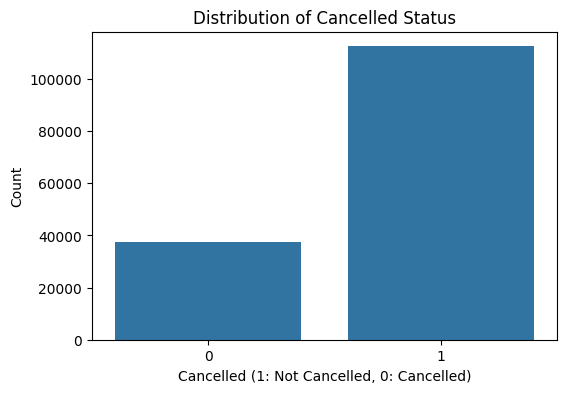

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cancelled', data=df)
plt.title('Distribution of Cancelled Status')
plt.xlabel('Cancelled (1: Not Cancelled, 0: Cancelled)')
plt.ylabel('Count')
plt.show()

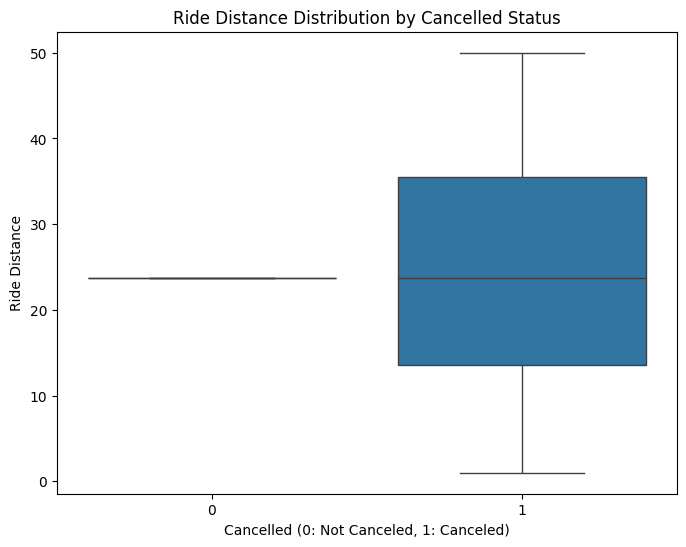

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cancelled', y='Ride Distance', data=df)
plt.title('Ride Distance Distribution by Cancelled Status')
plt.xlabel('Cancelled (0: Not Canceled, 1: Canceled)')
plt.ylabel('Ride Distance')
plt.show()

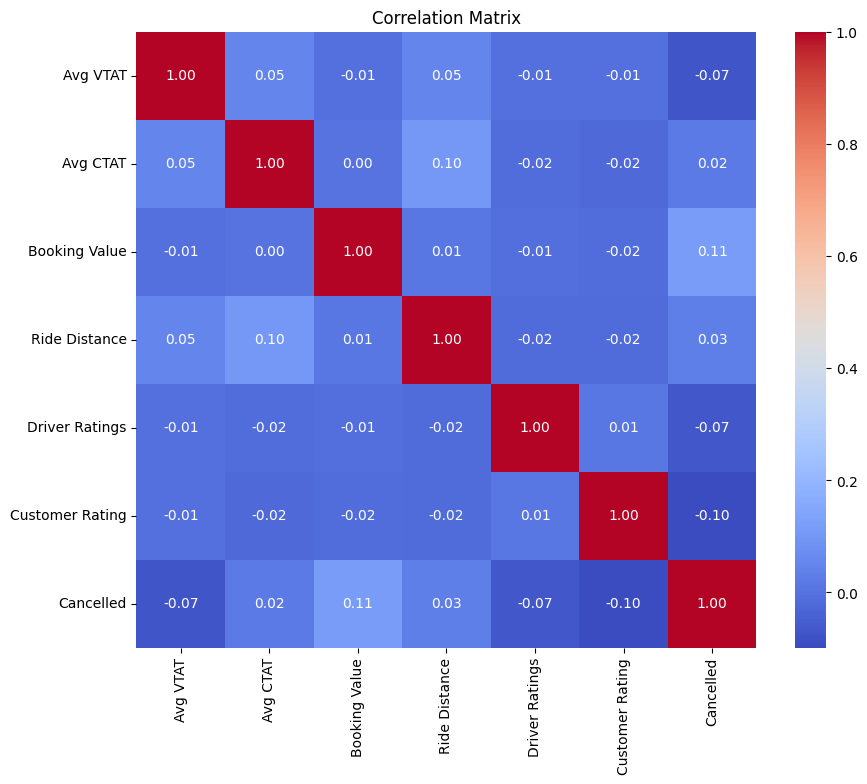

In [44]:
numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Cancelled']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [65]:
features = ['Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver',
            'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings',
            'Customer Rating', 'DayofWeek', 'Month', 'Hour',
            'Reason for cancelling by Customer', 'Driver Cancellation Reason',
            'Vehicle Type', 'Payment Method', 'Booking Status']
target = 'Cancelled'

columns_to_drop = ['Date', 'Time', 'Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location', 'Incomplete Rides Reason']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)

categorical_features = ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Vehicle Type', 'Payment Method', 'Booking Status']
df_encoded = pd.get_dummies(df.drop(columns=[target]), columns=categorical_features, drop_first=True)

if 'Booking Status' in df_encoded.columns:
    df_encoded.drop(columns=['Booking Status'], inplace=True)


X = df_encoded
y = df[target]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)


X_train shape: (105000, 33)
X_test shape: (45000, 33)
y_train shape: (105000,)


In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [67]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11250
           1       0.75      1.00      0.86     33750

    accuracy                           0.75     45000
   macro avg       0.38      0.50      0.43     45000
weighted avg       0.56      0.75      0.64     45000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[    0 11250]
 [    0 33750]]


In [75]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 78750, number of negative: 26250
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 105000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.750000 -> initscore=1.098612
[LightGBM] [Info] Start training from score 1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

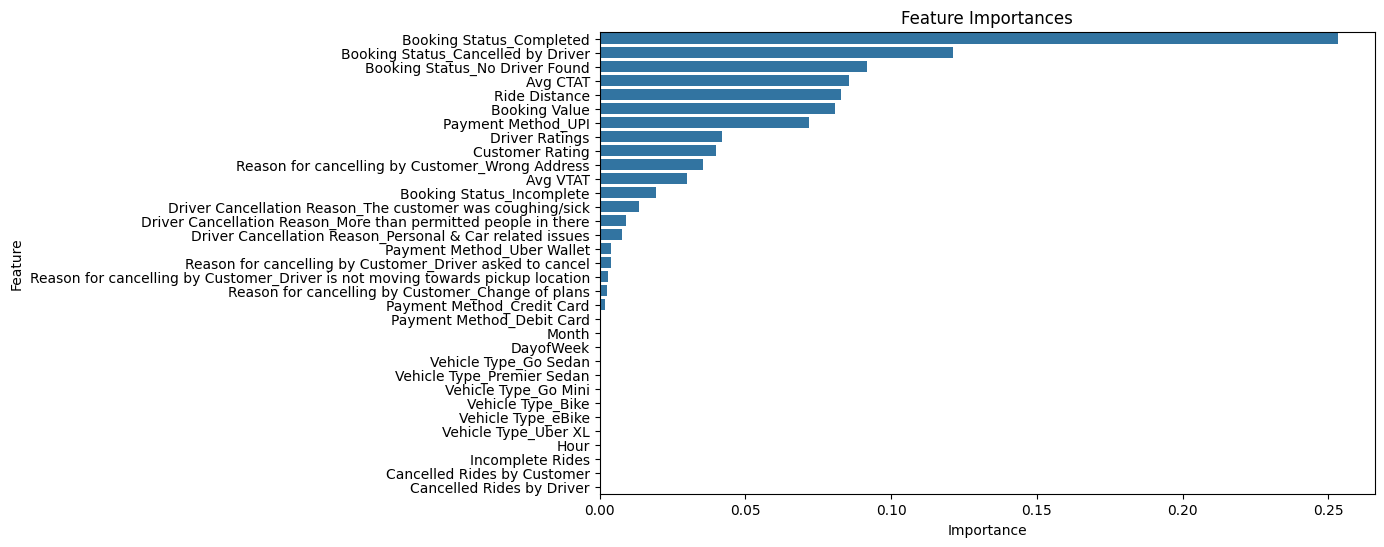

In [74]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()